TestImg1: ./image/600x400.jpg
image_equal


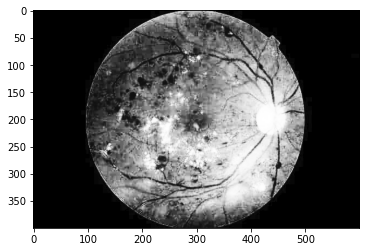

img_clahe


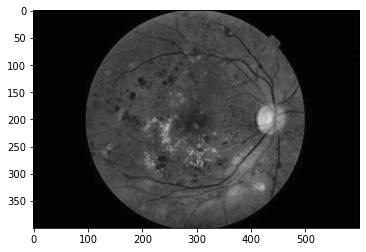

img_clahe_color


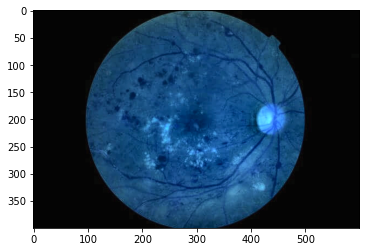

image_lap


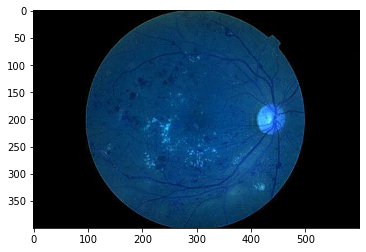

image_log


C:\Users\chung\Anaconda3\envs\keras2.3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log


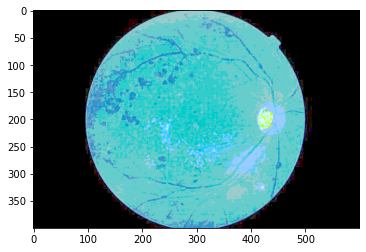

image_gamma


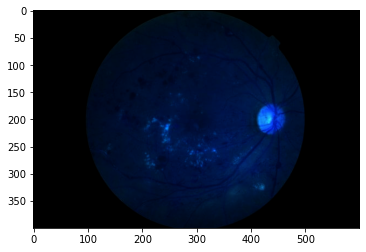

img_entropy


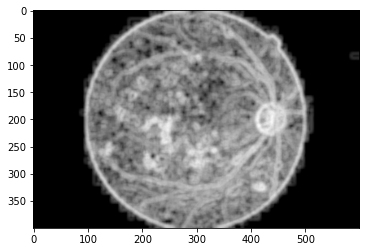

TestImg1: ./image/P_20210909_163542.jpg
image_equal


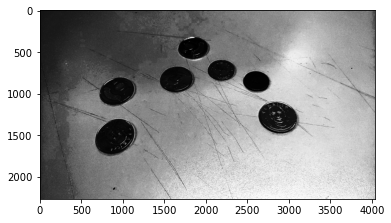

img_clahe


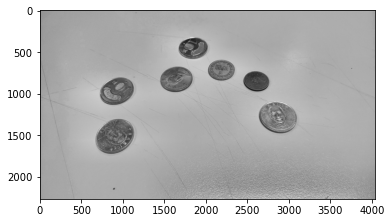

img_clahe_color


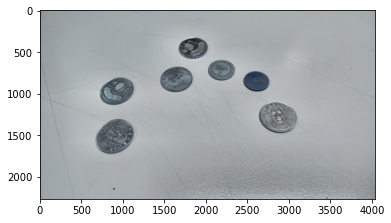

image_lap


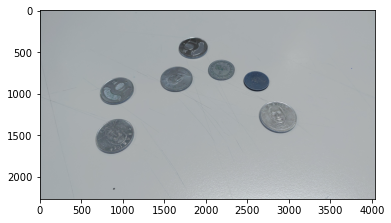

image_log


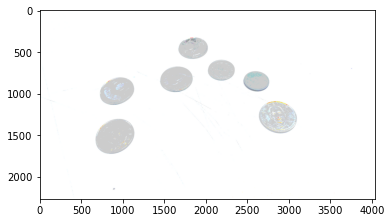

image_gamma


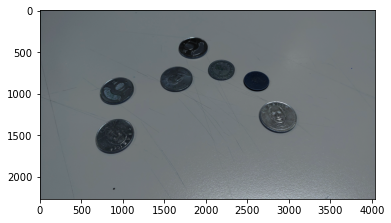

img_entropy


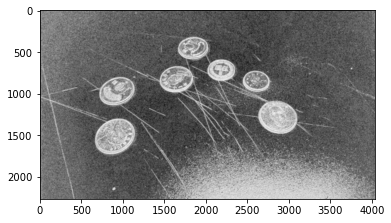

In [1]:
##################################################
### 載入模組
##################################################
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters.rank import entropy
from skimage.morphology import disk
##################################################
### 定義圖片格式
##################################################
img_width,img_height = 512,512
channels = 3
ImgSize = (img_width,img_height,channels)

##################################################
### 合併檔案
##################################################
#InputPath = 'I:/Deep_Learning_Workspace/20180925-青光眼/20181121-青光眼-10-fold-training-去M/direct1_augmented/test/Glaucoma/' 
#OutPath = 'I:/Deep_Learning_Workspace/20180925-青光眼/20181121-青光眼-10-fold-training-去M/direct1-combined_augmented/test/Glaucoma/' 
InputPath = './image/'  #有中文路徑不行
OutPath = './output/' 


files = [filename for filename in os.listdir(InputPath)]
NNN=0
#print(dir1)
for Nid in range(int(len(files))):
    NNN=NNN+1
    
    #image1
    TestImg1 = InputPath+files[Nid]
    print('==============================')
    print('TestImg1:',TestImg1)
    pltimg1 = cv2.imread(TestImg1)
    image_gray = cv2.cvtColor(pltimg1,cv2.COLOR_RGB2GRAY)
    
#    直方圖均衡增強
    image_equal = cv2.equalizeHist(image_gray)
    image_equal = cv2.cvtColor(image_equal, cv2.COLOR_GRAY2BGR)  
    print('image_equal')
    plt.imshow(image_equal)
    plt.show()
    
#   gray CLAHE 
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(image_gray)
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2BGR)
    print('img_clahe')
    plt.imshow(img_clahe)
    plt.show()  

#   color CLAHE    
#Conversion of RGB to LAB(L for lightness and a and b for the color opponents green–red and blue–yellow) will do the work. Apply CLAHE to the converted image in LAB format to only Lightness component and convert back the image to RGB. Here is the snippet.
    lab = cv2.cvtColor(pltimg1, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    img_clahe_color = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)   
    print('img_clahe_color')
    plt.imshow(img_clahe_color)
    plt.show() 
    
#   拉普拉斯算法增強
    kernel = np.array([ [0, -1, 0],  
                    [-1,  5, -1],  
                    [0, -1, 0] ]) 
    image_lap = cv2.filter2D(pltimg1,cv2.CV_8UC3 , kernel)
    print('image_lap')
    plt.imshow(image_lap)
    plt.show() 
    
#    對數算法增強
    image_log = np.uint8(np.log(np.array(pltimg1) +1))    
    cv2.normalize(image_log, image_log,0,255,cv2.NORM_MINMAX)
     #    轉換成8bit圖像顯示
    cv2.convertScaleAbs(image_log,image_log)
    print('image_log')
    plt.imshow(image_log)
    plt.show() 
    
    
#    伽馬變換
    fgamma = 2
    image_gamma = np.uint8(np.power((np.array(pltimg1)/255.0),fgamma)*255.0)
    cv2.normalize(image_gamma, image_gamma, 0, 255, cv2.NORM_MINMAX)
    cv2.convertScaleAbs(image_gamma, image_gamma)
    print('image_gamma')
    plt.imshow(image_gamma)
    plt.show() 
    
# Entropy image
    img_entropy = entropy(image_gray, disk(5))
    cv2.normalize(img_entropy, img_entropy, 0, 255, cv2.NORM_MINMAX)
    cv2.convertScaleAbs(img_entropy, img_entropy)
    img_entropy = np.uint8(img_entropy)
    img_entropy = cv2.cvtColor(img_entropy, cv2.COLOR_GRAY2BGR)
    print('img_entropy')
    plt.imshow(img_entropy)
    plt.show()

# resize image
    pltimg1 = cv2.resize(pltimg1,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #原圖
    image_equal = cv2.resize(image_equal,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #直方圖
    image_log = cv2.resize(image_log,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #log
    image_gamma = cv2.resize(image_gamma,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #gamma
    img_entropy = cv2.resize(img_entropy,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #entropy
    img_clahe = cv2.resize(img_clahe,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #img_clahe
    img_clahe_color = cv2.resize(img_clahe_color,(ImgSize[1],ImgSize[0]),interpolation=cv2.INTER_CUBIC) #img_clahe_color

# compbine image

    image_c=np.zeros((2*ImgSize[1],3*ImgSize[0], 3), dtype="uint8")
    (hA, wA) = pltimg1.shape[:2]
    image_c[0:hA, 0:wA] = pltimg1
    image_c[0:hA, wA:2*wA] = image_equal
    image_c[0:hA, 2*wA:3*wA] = img_clahe_color
    
    image_c[hA:, 0:wA] = image_log
    image_c[hA:, wA:2*wA] = image_gamma
    image_c[hA:, 2*wA:3*wA] = img_entropy

#output image
    name=OutPath+files[Nid][:-5]+'_comb.jpg'
    cv2.imwrite(name, image_c)   
    
#     break